# Continuous Probability Distributions

As usual, we first include the usual libraries.  

In [1]:
# Useful libraries
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from matplotlib import axes 
from scipy.stats import binom, norm, expon
from numpy import pi

Next define the plot parameters

In [2]:
# This sets the size and properties of the plots when using matplotlib.pyplot
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
    # "ytick.major.right":False,
    # "xtick.major.top":False
},'seaborn-poster'])

## Uniform Distribution

### PDF and CDF
This section contains a code that plots the probability density function (PDF) of $U[a,b]$, the uniform distribution over the interval $[a,b]$. The output contains interactive sliders that you can use to vary  $a$ and $b$ over $[0,10]$. The code also  plots the cumulative density function (CDF) of $U[a,b]$ on the same plot.

In [3]:
# %load uniform
def f(s):
    a,b = s
    xrange = np.linspace(0, 10, 101)
    cdf = [0 for z in xrange if z<=a]
    cdf.extend([(z-a)/(b-a) for z in xrange if z>a and z<=b])
    cdf.extend([1 for z in xrange if z>b])
    
    # Plot the PDF
    if b != a:
        plt.plot([a+(b-a)*(i/10) for i in range(11)], [1/(b-a)]*11, linewidth = 3.0, label = 'PDF')
        plt.plot([a, a], [0, 1/(b-a)],'g--',
                 [b, b], [0, 1/(b-a)],'g--', linewidth = 2.0)
        
    # Plot the CDF
    plt.plot(xrange, cdf, 'r', linewidth = 3.0, label = 'CDF')

    plt.title('PDF and CDF of U({},{})'.format(a,b))
    plt.xlabel('x')
    plt.ylabel('y')      
    plt.legend()
    plt.show()
    
w = widgets.FloatRangeSlider(
    description = "[a, b]",
    value=[4, 6],
    min=0,
    max=10,
    step=0.01,
    continuous_update = False)

widgets.interact(f, s = w)

interactive(children=(FloatRangeSlider(value=(4.0, 6.0), continuous_update=False, description='[a, b]', max=10…

<function __main__.f(s)>

The next code illustrates that the value of the CDF at any point $x_0$ is the area under the PDF over $[-\infty, x_0]$.

In [4]:
@widgets.interact(x=(0.0,1.0,0.01),continuous_update=False)
def f(x):
    # For the PDF
    x_support =np.linspace(0, 1, 101)
    y = [1]*101
    
    plt.subplot(2, 1, 1)
    plt.plot(x_support, y, 'b', linewidth = 3.0, label = 'PDF')
    plt.plot([0, 0], [0, 1], 'g--',
             [1, 1], [0, 1], 'g--', linewidth = 2.0)
    plt.gca().fill_between(x_support, y, where = x_support<=x, facecolor='cyan')
    plt.xlim([-0.2,1.2])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("PDF")
    
    # For CDF
    x_range = np.linspace(-0.5, 1.5, 201)
    cdf=[0 for z in x_range if z<0]
    cdf.extend([z for z in x_range if z>=0 and z<=1])
    cdf.extend([1 for z in x_range if z>1])
    
    plt.subplot(2, 1, 2)

    plt.plot(x_range, cdf, 'r', linewidth = 3.0, label = 'CDF')
    plt.plot(x, x, 'bo',
             [0, 0], [0, 1], 'g--',
             [1, 1], [0, 1], 'g--', 
             [-1, x], [x, x], 'm--',
             [x, x], [0, x], 'm--', linewidth=2.0)
    plt.xlim([-0.2,1.2])    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.tight_layout()
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Exponential Distribution

### PDF and CDF

The code below plots the PDF and the CDF of the exponential distribution with parametere $\lambda$. You can use interactive sliders to vary the value of $\lambda$ over $[0.01, 10]$. You can also vary the ranges of the coordinate axes in order to change the portion of the curves displayed.

In [5]:
@widgets.interact(lam=(0.01,10.0,0.01),x_max=(10,100),SampleSize=(1,1000),continous_update=False)
def f(lam, x_max,CDF=False,SampleSize=100,histogram=False):
    x = np.arange(0, x_max, x_max/1000)
    y = lam*np.exp(-lam*x)
    z = 1 - np.exp(-lam*x)
    # Plot the PDF
    plt.plot(x, y, linewidth = 3.0, label = 'PDF')
    # Plot the CDF
    if CDF == True:
        plt.plot(x, z, 'r', linewidth = 3.0, label = 'CDF')
    if histogram:
        samples= scipy.stats.expon.rvs(1/lam,size=SampleSize)
        plt.hist(samples,bins=30,normed=True)
    plt.xlim([0,x_max])
    plt.title("Exponential({})".format(lam))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=5.0, description='lam', max=10.0, min=0.01, step=0.01), IntSlider(valu…

### Exponential Approximation of the Geometric Distribution

The next plot compares the geometric distribution and its exponential distribution approximation. For a closer analogy we plot the geometric distribution that starts with 0 namely $p(n)=p\cdot(1-p)^n$ for $n\ge0$.

In [6]:
@widgets.interact(n=(2,100),p=(0.0,1.0,0.01))
def exponential_approx(n, p):
    '''
    Approximate the PMF of the geometric distribution with the 
    PDF of the exponential distribution.
    '''
    x = np.arange(n+1)
    x2 = np.linspace(0,n,num=10*n)
    y = [((1-p)**(z))*p for z in x]
    lam = p
    y0 = lam*np.exp(-lam*x2)
    
    plt.plot(x2, y0, label = 'Exponential({})'.format(lam))
    plt.plot(x, y, 'r', label = 'Geometric({})'.format(p))
    
    
    plt.title("Exponential Approximation of Geometric(%.2f)" %p, fontsize = 20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
        
    
    print('|| P_Exponential - P_Geometric ||\u2081 = ',sum(abs(y-y0[0:n:10*n])))


interactive(children=(IntSlider(value=51, description='n', min=2), FloatSlider(value=0.5, description='p', max…

## Normal Distribution

### PDF and CDF
The code below plots the PDF and CDF of $N(\mu,\sigma^2)$. Use the interactive sliders available to vary the mean and the variance of the distribution as well as the ranges of the coordinate axes.

In [7]:
# Plots pdf of a normal distribution
@widgets.interact(mu=(-25.0,25.0),var=(0.3,30.0))
def plot_pdf(mu, var, CDF=False):
    '''
    Takes mean, variance, range of x and y axes, and whether CDF desired.
    Plots PDF, and optionally CDF.
    '''
    x = np.linspace(-50, 50, 1001)
    sig = var**0.5
    P_norm = norm.pdf(x, mu, sig)
    
    plt.plot(x, P_norm, 'b', linewidth=3.0, label = "PDF")
    if CDF == True:
        CDF_norm = norm.cdf(x, mu, sig)
        plt.plot(x, CDF_norm, 'r', linewidth=3.0, label = "CDF")
    y0 = (1/(sig*np.sqrt(2*pi)))*np.exp(-0.5)
    ym = 1/(sig*np.sqrt(2*pi))
    plt.plot([mu-sig, mu-sig], [0, y0], 'm--',linewidth = 2.0)
    plt.plot([mu+sig, mu+sig], [0, y0], 'm--', linewidth = 2.0, label = '$\mu\pm\sigma$')
    plt.plot([mu,mu], [0,ym], 'g--', linewidth = 2.0, label = r'$\mu$')
    
    plt.title('PDF of N({},{})'.format(mu,var))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mu', max=25.0, min=-25.0), FloatSlider(value=15.15, …

### Normal Approximation of the Binomial Distribution
The code below illustrates that for large $n$, the distribution $N\left(np, np(1-p)\right)$ is a good approximation to $Binomial(n,p)$. Observe that the $L_1$ distance between the two distributions decreases with $n$.

In [8]:
@widgets.interact(n=(1,200),p=(0.0,1.0,0.01))
def f(n, p):
    x = np.arange(0, n + 1)
    x_in = np.linspace(0,n+1,1001)
    P_binom = binom.pmf(x, n, p)
    stddev = (n * p * (1 - p))**0.5
    P_norm = norm.pdf(x_in, n * p, stddev)
    plt.plot(x_in,P_norm,'r',linewidth=2.0,label="N(%0.2f, %0.2f)" % (n * p, stddev**2))
    plt.plot(x, P_binom, '-', linewidth=2.0, label="Bin(%i, %0.2f)" % (n, p))

    plt.title('Normal Approximation of Binomial')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    P_norm = norm.pdf(x, n * p, stddev)
    print('|| P_Normal - P_Binomial ||\u2081 = ', sum(abs(P_norm - P_binom)))
 

interactive(children=(IntSlider(value=100, description='n', max=200, min=1), FloatSlider(value=0.5, descriptio…

### Example: Buffon's Needle

Consider two parallel lines lying on the plane of the floor such that the separation between them (the perpendicular distance) is 1 unit. Without loss of generality, let the lines be given by $y=0$ and $y=1$. Throw a unit-length needle onto the floor in such a way that the $y$-coordinate of its midpoint is uniform over $[0,1]$ and the angle made by the needle with the positive $x$-axis is uniform over $[0, \pi]$. Then it can be shown that the probability that the needle intersects any of the parallel lines is $2/\pi$. The code below computes this probability empirically in order to estimate the value of $\pi$.

In [9]:
construct_line = lambda x,y,theta: [[x-0.5*np.cos(theta), x+0.5*np.cos(theta)],[y-0.5*np.sin(theta),y+0.5*np.sin(theta)]]
PI = np.pi
@widgets.interact(n_sample=(100,10000),k=(10,100),continuous_update=False)
def estimate_pi(n_sample, k):
    count = 0  # To count the number of needles intersecting one or both of the parallel lines
    y_center = (random.uniform(0,1) for _ in range(n_sample+k))
    x_center = (random.uniform(0,1) for _ in range(n_sample+k))
    theta_sample = (rfandom.uniform(0,PI) for _ in range(n_sample+k))
    
    for x,y,theta,_ in zip(x_center,y_center,theta_sample,range(n_sample)):
        X,Y = construct_line(x,y,theta)
        if Y[0]<0 or Y[1]>1:
            count+=1
    print("The estimate of pi based on {} samples is:{}".format(n_sample,2*n_sample/count))
    
    plt.plot([-0.3, 1.3],[0,0],'k',
            [-0.3, 1.3],[1,1],'k',linewidth=5)
    for x,y,theta in zip(x_center,y_center,theta_sample):
        X,Y = construct_line(x,y,theta)
        plt.plot(X,Y)
        plt.xlim([-0.3, 1.3])
        plt.ylim([-0.3, 1.3])
    
    plt.show()

# widgets.interact(estimate_pi, 
#                  n_sample=widgets.IntSlider(description ="n",
#                                             min=100, 
#                                             max=10000, 
#                                             continuous_update=False),
#                  k=widgets.IntSlider(description = "",
#                                      min=10, 
#                                      max=100, 
#                                      continuous_update=False))

interactive(children=(IntSlider(value=5050, description='n_sample', max=10000, min=100), IntSlider(value=55, d…

### Another way to Determine $\pi$
Consider a square of side-length $2a$. Let a circle of radius $a$ be inscribed in this square. If you pick a point uniformly at random from the square, the probability that the selected point also belongs to the inscribed circle is clearly the ratio of the areas of the circle and the square, which is given by $\pi a^2/(2a)^2$. This evaluates to $\pi/4$. The code below estimates the value of $\pi$ by determining this probability empirically. The number of iterations $n$ can be varied using a slider. Hit the play button to simulate the selection of points and the subsequent calculation of $\pi$.

interactive(children=(IntSlider(value=10, continuous_update=False, description='Samples', max=1000, min=10, st…

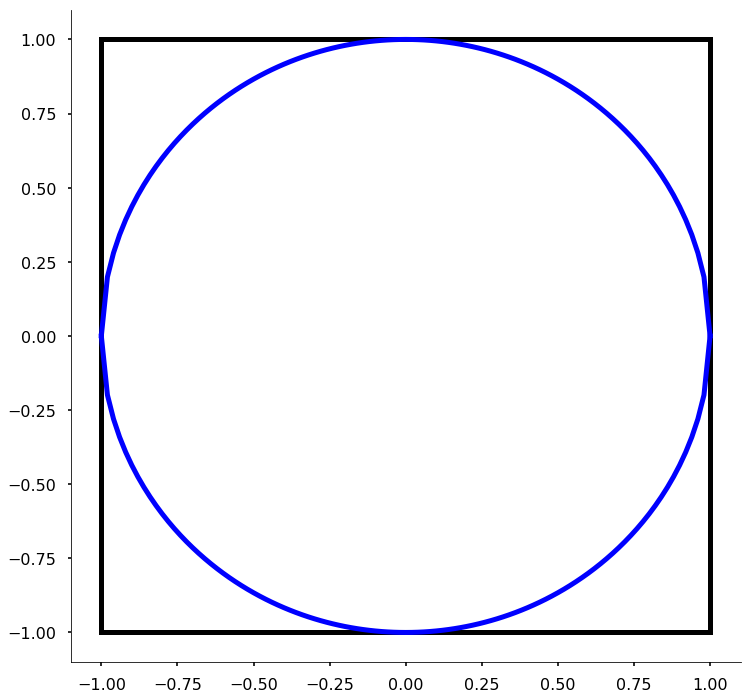

In [10]:
def f(n):
    plt.figure(figsize=(12,12))
    plt.plot([-1, 1], [1, 1], 'k', 
         [-1, 1], [-1, -1], 'k', 
         [-1, -1], [-1, 1], 'k', 
         [1, 1], [-1, 1], 'k', linewidth=5.0)
    x = np.linspace(-1, 1, 101)
    y = (1 - x * x)**0.5
    plt.plot(x, y, 'b',
             x,-y, 'b', linewidth=5.0)
    samples = zip((random.uniform(-1,1) for _ in range(n)),(random.uniform(-1,1) for _ in range(n)))
    count=0
    for x,y in samples:
        if x**2+y**2<=1:
            plt.scatter(x,y,c='r',s=12)
            count+=1
        else:
            plt.scatter(x,y,c='g',s=12)
    plt.show()
    print("Estimated value of pi: {}".format(4*count/n))
    
play = widgets.Play(
    interval=500,
    max=10000,
    step=10,
    description="Press play",
    disabled=False,
    show_repeat=False)
slider = widgets.IntSlider(description="Samples",min=10, max=1000, step=10,continuous_update=False)
widgets.jslink((play, 'value'), (slider, 'value'))

widgets.interact(
    f,
    n=slider, )
widgets.HBox([play, slider])